In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Dataset Link: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop("Id",inplace=True,axis=1)
data.shape

(150, 5)

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data Visualization

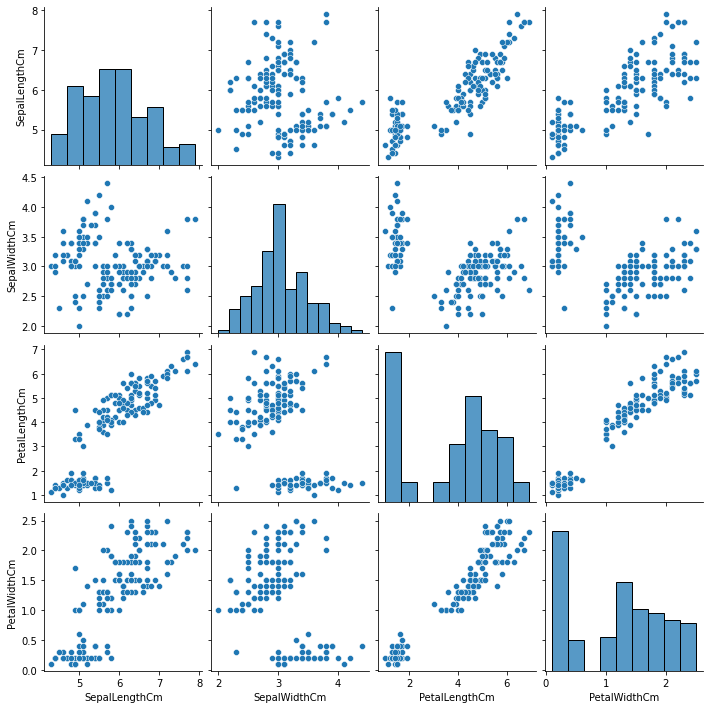

In [6]:
import seaborn as sns
sns.pairplot(data)

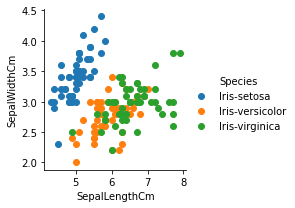

In [7]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

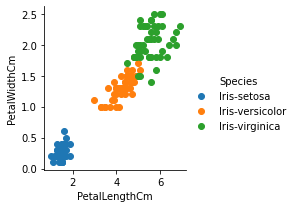

In [8]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

Spliting Data

In [9]:
X = data.drop("Species",axis=1)
y = data["Species"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

Model Creation

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predict Model

In [12]:
y_pred = model.predict(X_test)

In [13]:
compare_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_data

,Actual,Predicted
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
56,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
44,Iris-setosa,Iris-setosa
29,Iris-setosa,Iris-setosa
120,Iris-virginica,Iris-virginica


In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


Tree Visualization

In [15]:
y.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

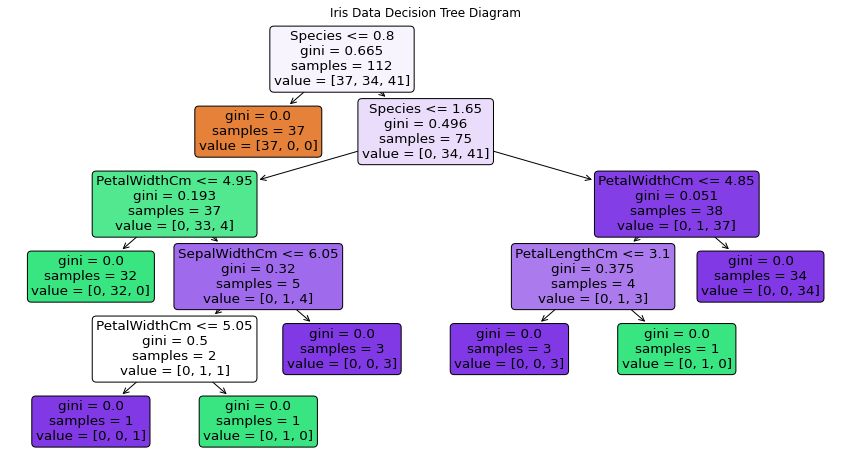

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(model,feature_names = data.iloc[:, 1:5].columns.values,
        rounded=True,
        filled=True
)
plt.title("Iris Data Decision Tree Diagram")
plt.show()